# Notebook 3: Option Trading with ML
## Feature Selection
What could possibly go wrong?
5/10/2020

First you scale
Feature Selection and Reduction

Feature selection and reduction is a critical step in designing a machine learning project.

Bad feature sets cause many problems.
Overfitting
Slower training and testing

Good feature sets create many benefits.
Fast training and testing.
Better human insights

Several methods of feature selection and reduction.
Univariate Testing
Correlation table with heat map - seaborn and cor
Testing feature combinations with a Learner


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing     import StandardScaler
from sklearn.decomposition     import PCA


raw_features = pd.read_csv('opt_sample.csv', index_col = 0)

# Remove duplicate features

dup_features = ['STO_open_strike_delta%', 'stock_price_at_open']


print(raw_features.shape)
#print(raw_features['label'])
#features_np = raw_features.copy()
features_np = raw_features.to_numpy(copy = True)
#print('features_np')
#print(features_np)
#print(type(features_np))
scaler = StandardScaler()
features = scaler.fit_transform(features_np)
#print(features)
#print(features.head())
#print(features.columns.tolist())

X_train = features[:,:26]  #independent features (columns)
#print('X_train')
#print(X_train.head(5))
y_train = features[:,-1]    #label column
#print('y_train')
#print(y_train.head())

#apply SelectKBest class to measure and rank features.

bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_train,y_train)
feature_scores = pd.DataFrame(fit.scores_)
feature_columns = pd.DataFrame(raw_features.columns)
#print('feature_columns')
#print(feature_columns)

#print(feature_scores.head(5), feature_columns.head(5))

feature_scores = pd.concat([feature_scores, feature_columns],axis=1)
#print(feature_scores.head(8))
feature_scores.columns = ['Score', 'Feature']
#print(feature_scores.head(5))
feature_scores.sort_values(['Score'], ascending = False, inplace = True)
feature_scores = feature_scores.reset_index(drop = True)
feature_scores['Score'] = round(feature_scores['Score']) 
print(feature_scores)


(8000, 27)
     Score                   Feature
0   1692.0                STO_strike
1   1550.0                30 day SMA
2   1463.0    STO_open_strike_delta%
3   1443.0   STO_offer_strike_delta%
4   1292.0                45 day SMA
5   1073.0                15 day SMA
6    973.0                3 days old
7    968.0                10 day SMA
8    950.0             STO_offer_ARR
9    942.0                4 days old
10   881.0                2 days old
11   861.0                5 days old
12   849.0              STO_ask_fee%
13   836.0       stock_price_at_open
14   829.0                1 days old
15   816.0  stock_price_at_STO_offer
16   628.0                45 day vel
17   439.0                Yearly Min
18    30.0                30 day vel
19    28.0             STO_days_long
20    19.0               ER - Expiry
21     9.0                10 day vel
22     6.0                Yearly Max
23     3.0                 5 day vel
24     3.0                15 day vel
25     1.0                 

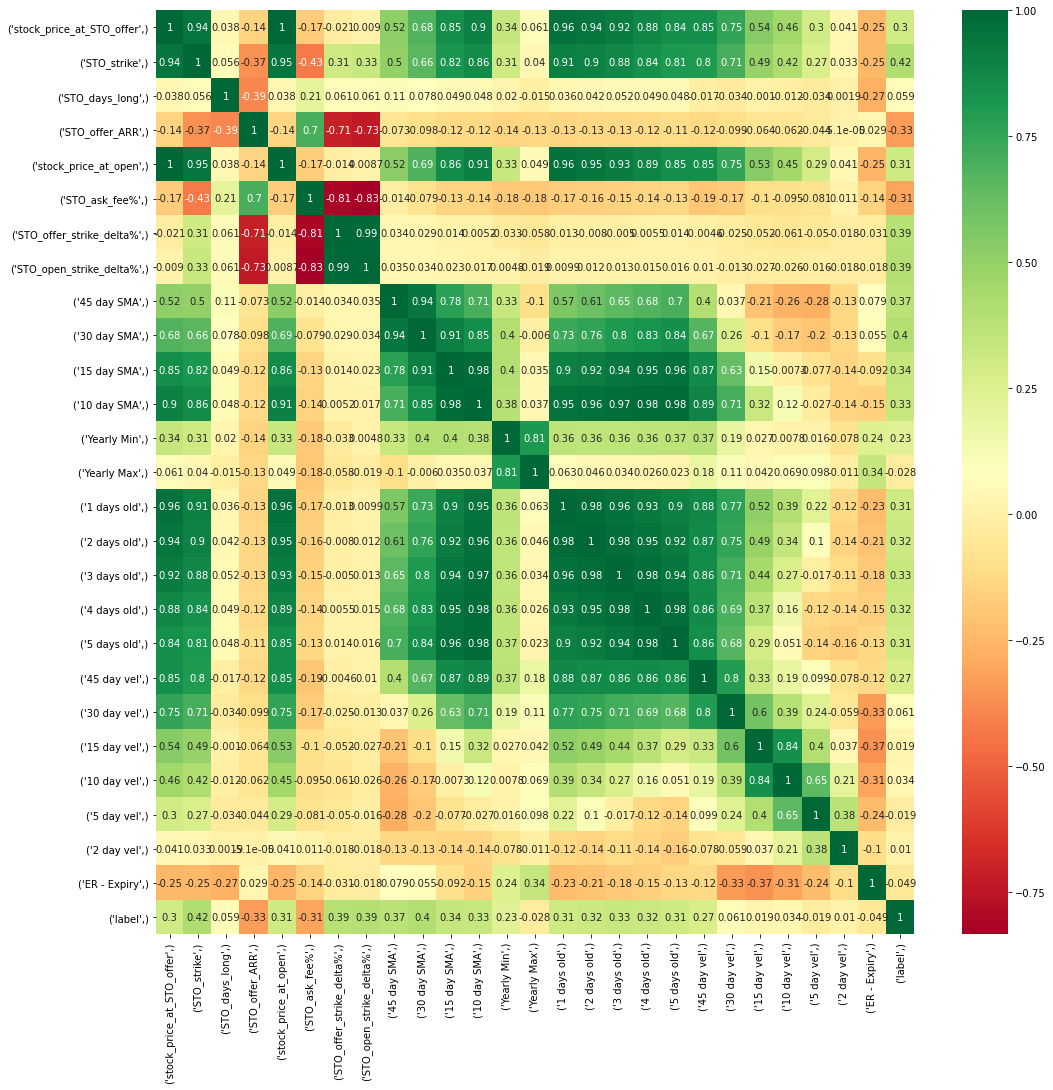

In [2]:
# Seaborn heat map
import seaborn as sb
import matplotlib.pyplot as plt

scaled_features = pd.DataFrame(features, columns = feature_columns)
corr_matrix = scaled_features.corr(method = 'pearson')
best_features = corr_matrix.index
plt.figure(figsize=(17,17))
#plot heat map
g=sb.heatmap(scaled_features[best_features].corr(),annot=True,cmap="RdYlGn")


In [3]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
print('starting selector.')
selector = selector.fit(X_train, y_train)
print('finished selector.')
print(selector.support_)   # selected features
print(selector.ranking_) # feature rank


starting selector.
finished selector.
[ True False False False  True False False False False False  True False
  True  True False False False False False False False False False False
 False False]
[ 1 10  9  8  1  7  5 11  3  2  1 13  1  1 12 19 17 16  6  4 20 15 14 21
 22 18]


In [10]:
from sklearn.decomposition     import PCA

X_reduced = PCA(n_components = 2).fit(scaled_features)
print(X_reduced.components_)
print(X_reduced.explained_variance_)
print(X_reduced.explained_variance_ratio_)

print('X_reduced')
print(X_reduced)

[[-0.27135822 -0.26464715 -0.01612873  0.05710373 -0.27198508  0.06453596
  -0.01989874 -0.02540166 -0.18037594 -0.22714817 -0.26900246 -0.27819557
  -0.11561876 -0.02313946 -0.27831257 -0.27875335 -0.27789592 -0.27429242
  -0.26830007 -0.25421778 -0.21032542 -0.12216121 -0.08027327 -0.02707819
   0.02511631  0.05510382 -0.10767463]
 [ 0.05149338 -0.11509742 -0.0505549   0.42736777  0.05141299  0.44685516
  -0.49927024 -0.50263173 -0.02273108 -0.01259061  0.01983016  0.03410354
  -0.04423166 -0.04138056  0.05098304  0.04794072  0.04225105  0.03618843
   0.03104359  0.03415807  0.07369014  0.08676416  0.07245056  0.04401971
   0.01105625 -0.06367671 -0.23307638]]
[12.40885887  3.61021521]
[0.45952992 0.13369496]
X_reduced
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
